In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F # actvs no params 
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [15]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)
        
    def forward(self, x):
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x  


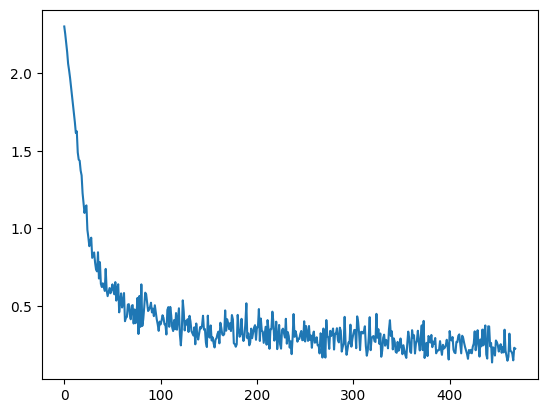

In [38]:
device = "cuda"
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 1 

train_dataset = datasets.MNIST(root="./dataset", train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root="./dataset", train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)



model = NN(input_size=input_size, num_classes=num_classes)
model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
lossi = []

for epoch in range(num_epochs):
    
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        data = data.reshape(data.shape[0], -1)
        
        scores = model(data)
        
        loss = criterion(scores, targets)
        
        optimizer.zero_grad()
        loss.backward()
        lossi.append(loss.item())        
        optimizer.step()
        
plt.plot(torch.tensor(lossi).view(-1, 2).mean(1))       

In [33]:
def acc(loader, model):
    if loader.dataset.train:
        print("train")
    else:
        print("test")
        
    num_corr = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for batch_idx, (data, targets) in enumerate(loader):
            data = data.to(device=device)
            targets = targets.to(device=device)

            data = data.reshape(data.shape[0], -1)

            scores = model(data)

            _, preds = scores.max(dim=1)
            num_corr += (preds==targets).sum().item()
            num_samples += preds.size(0)
            
    
    print(num_corr/num_samples * 100)
    
    model.train()
    
acc(train_loader, model)
acc(test_loader, model)

train
93.09666666666668
test
92.80000000000001
